In [ ]:
!unzip /content/sensor.csv.zip

Archive:  /content/sensor.csv.zip
  inflating: sensor.csv              


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv(r"/content/sensor.csv")

In [ ]:
data['Unnamed: 0']
data.drop(['Unnamed: 0'], axis=1, inplace = True)

In [ ]:
data.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16 

In [ ]:
data.drop(['sensor_15'],axis=1,inplace=True)

In [ ]:
data.isna().sum() #checks for missing values , and no missing values

timestamp             0
sensor_00         10208
sensor_01           369
sensor_02            19
sensor_03            19
sensor_04            19
sensor_05            19
sensor_06          4798
sensor_07          5451
sensor_08          5107
sensor_09          4595
sensor_10            19
sensor_11            19
sensor_12            19
sensor_13            19
sensor_14            21
sensor_16            31
sensor_17            46
sensor_18            46
sensor_19            16
sensor_20            16
sensor_21            16
sensor_22            41
sensor_23            16
sensor_24            16
sensor_25            36
sensor_26            20
sensor_27            16
sensor_28            16
sensor_29            72
sensor_30           261
sensor_31            16
sensor_32            68
sensor_33            16
sensor_34            16
sensor_35            16
sensor_36            16
sensor_37            16
sensor_38            27
sensor_39            27
sensor_40            27
sensor_41       

sensor 0


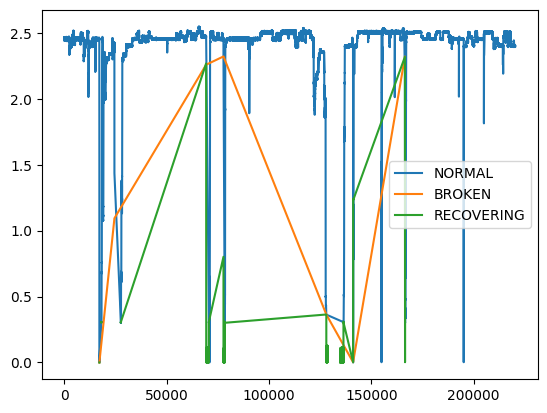

sensor 1


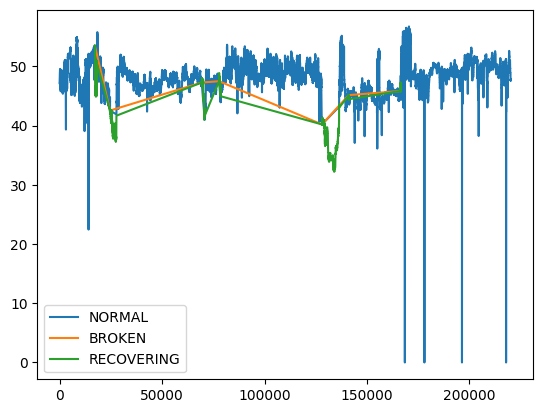

sensor 2


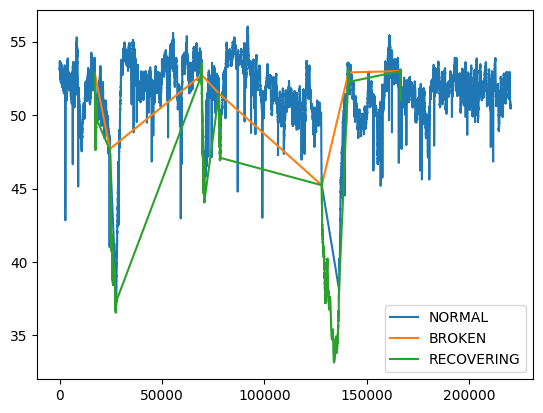

sensor 3


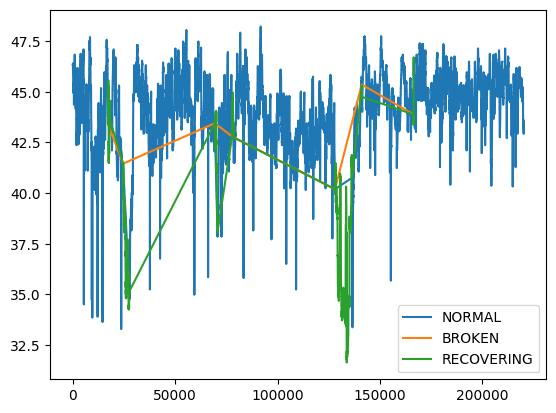

sensor 4


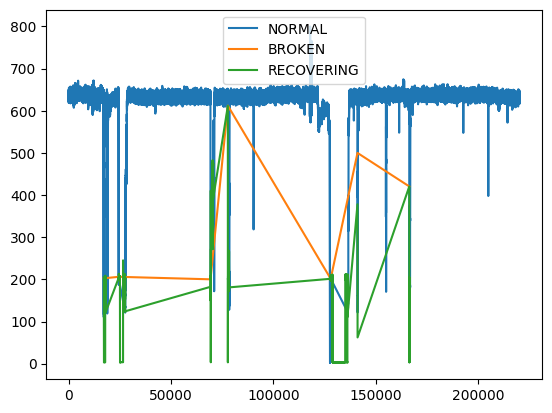

sensor 5


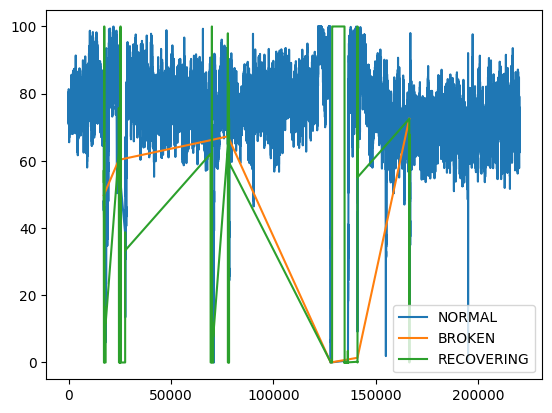

sensor 6


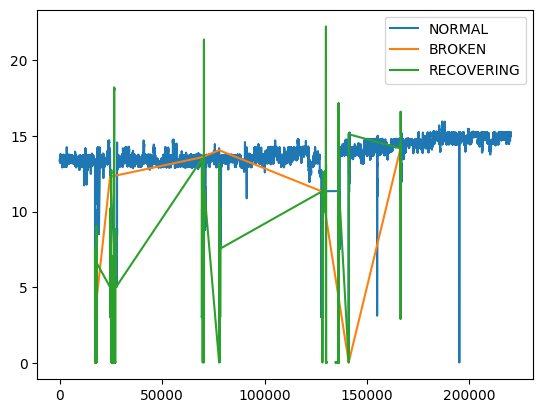

sensor 7


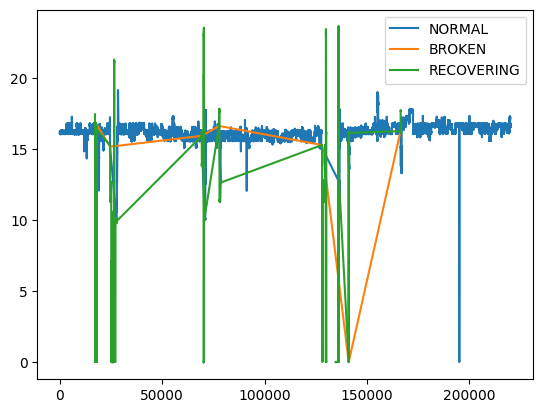

sensor 8


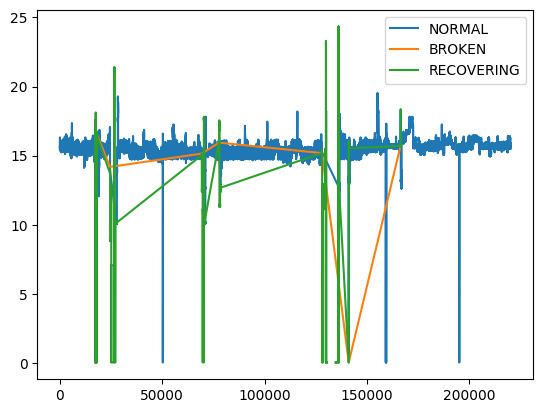

sensor 9


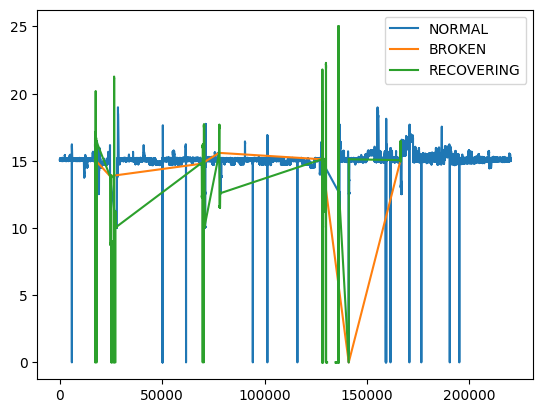

sensor 10


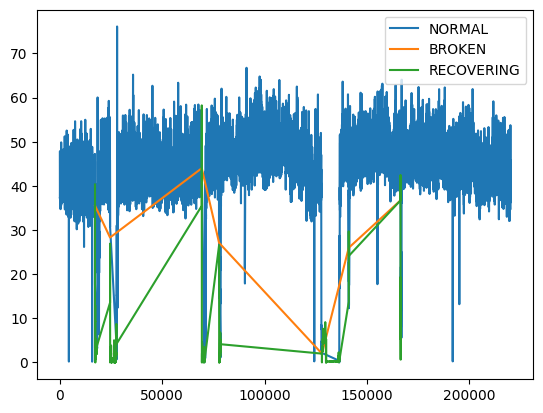

sensor 11


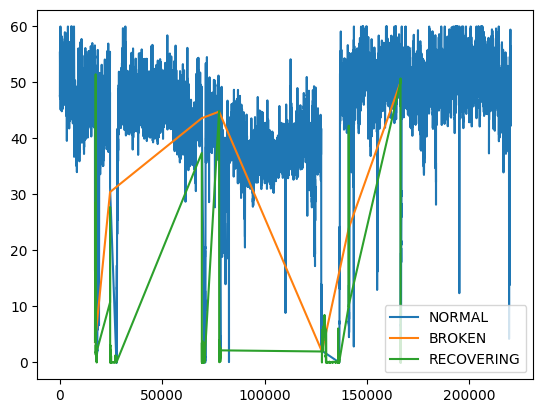

sensor 12


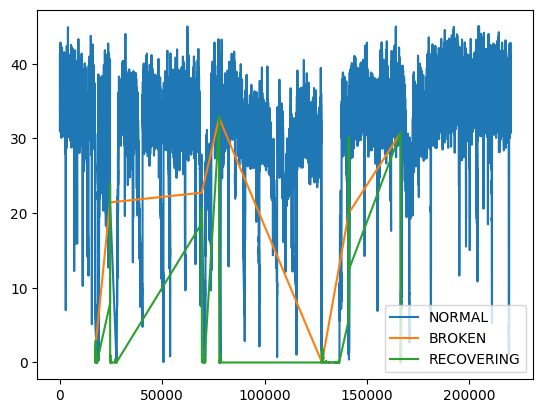

sensor 13


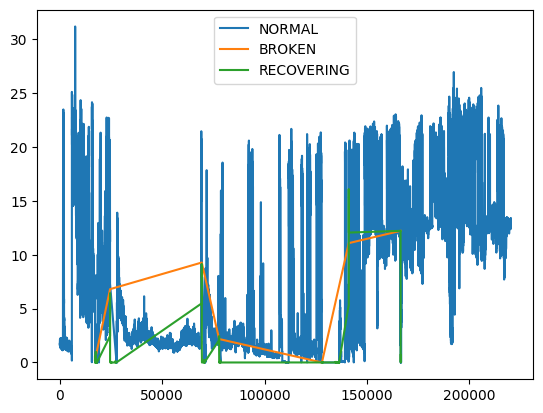

sensor 14


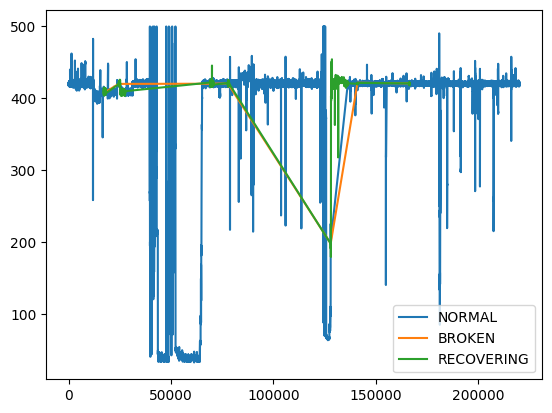

sensor 15
sensor 16


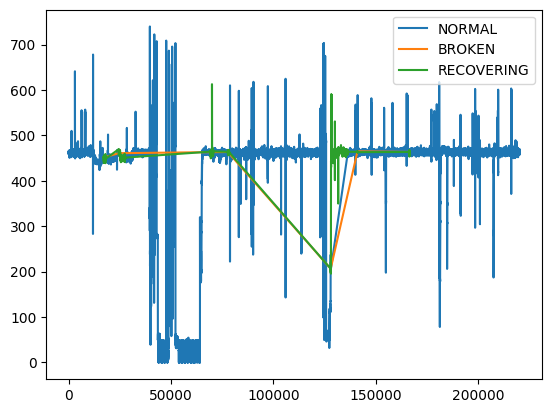

sensor 17


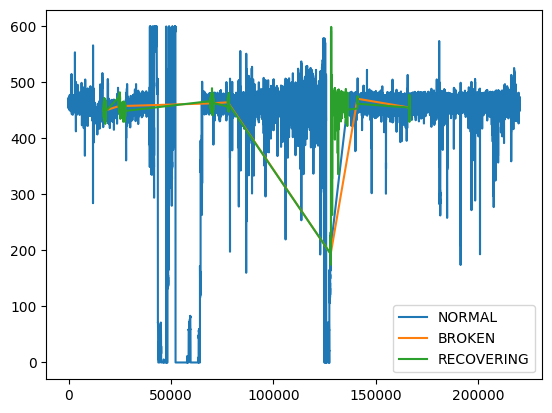

sensor 18


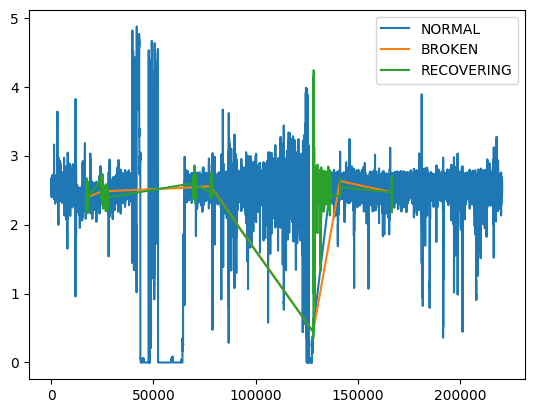

sensor 19


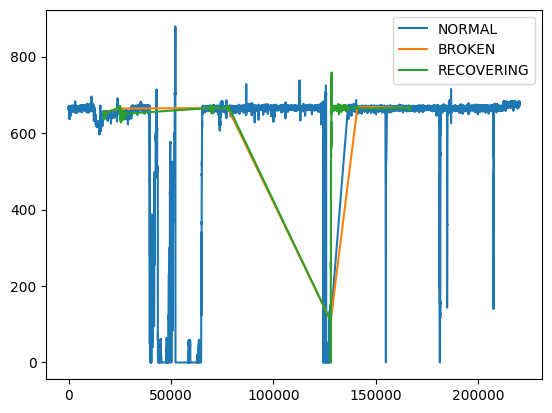

sensor 20


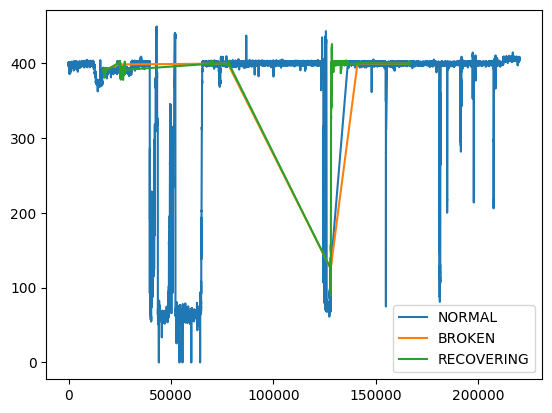

sensor 21


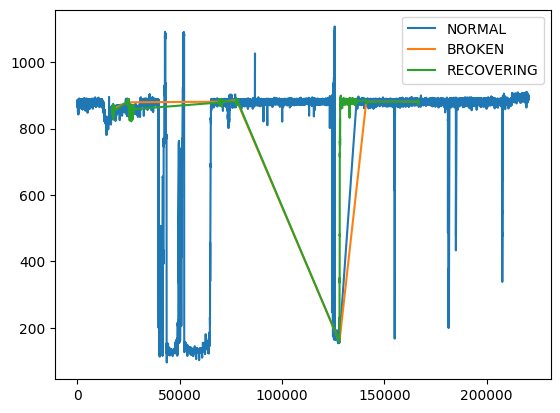

sensor 22


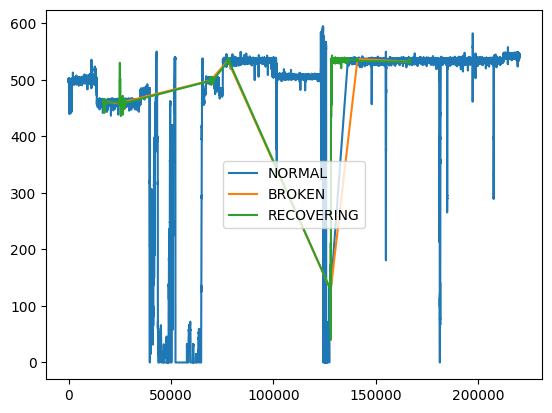

sensor 23


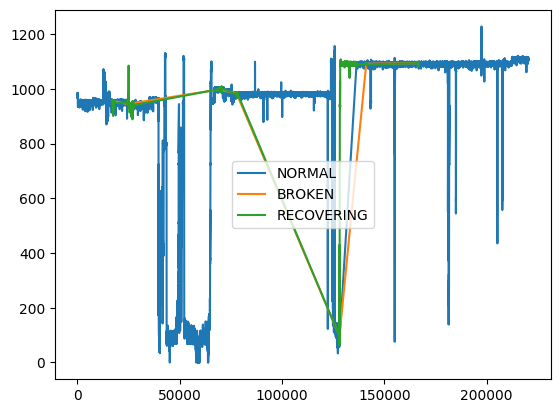

sensor 24


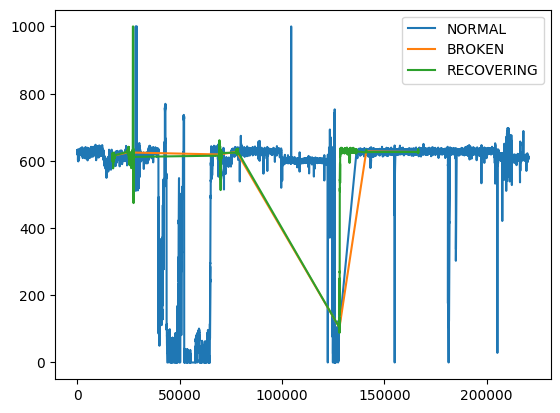

sensor 25


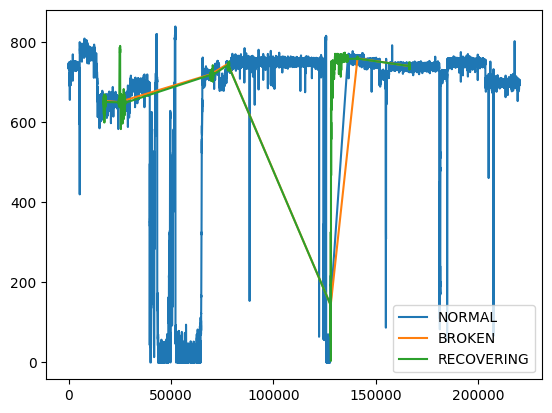

sensor 26


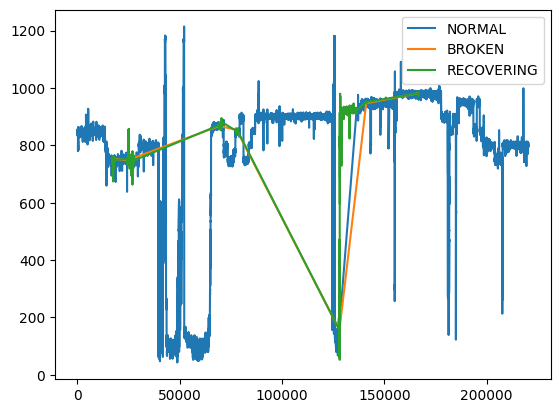

sensor 27


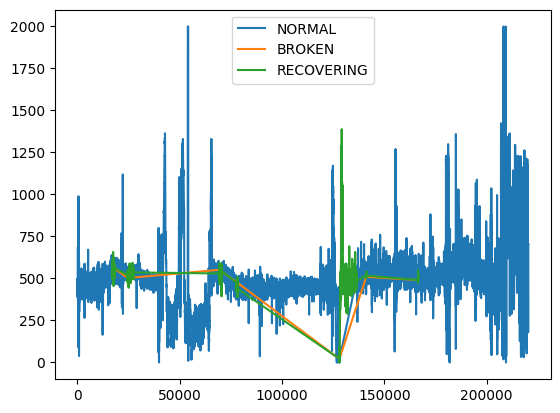

sensor 28


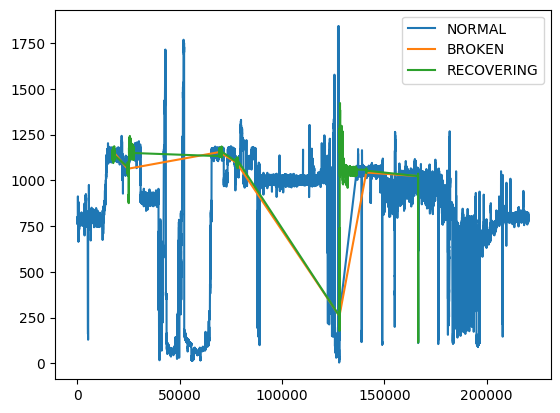

sensor 29


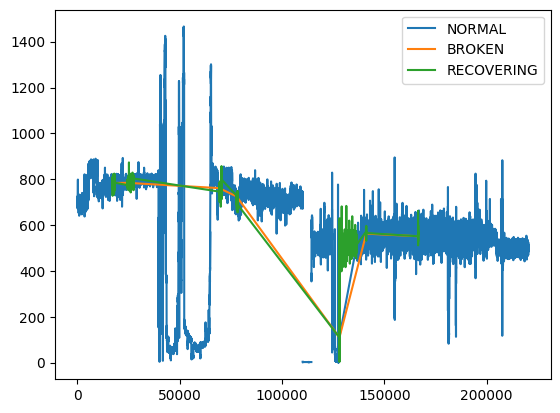

sensor 30


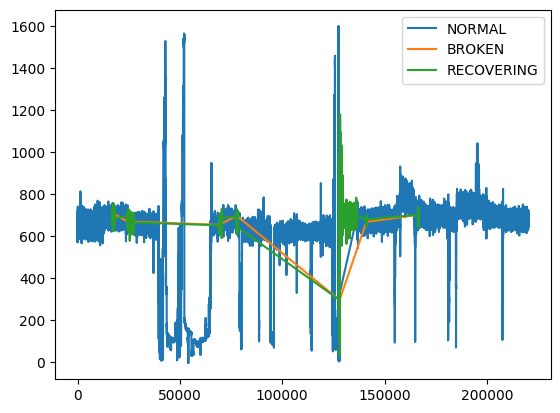

sensor 31


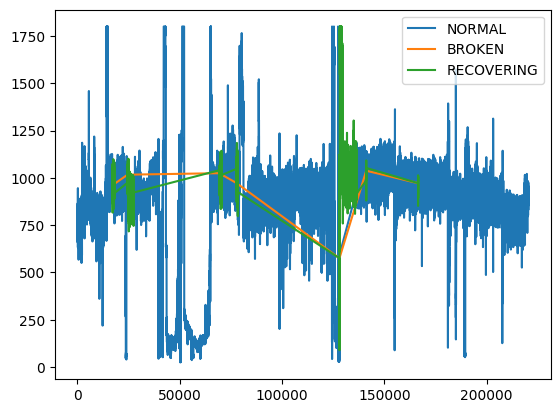

sensor 32


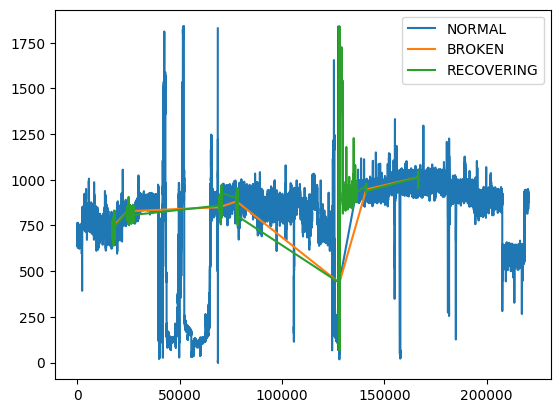

sensor 33


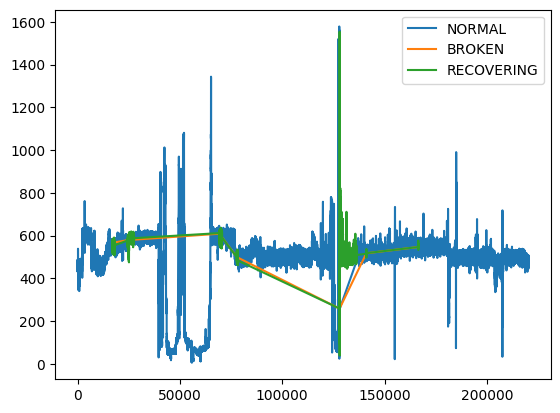

sensor 34


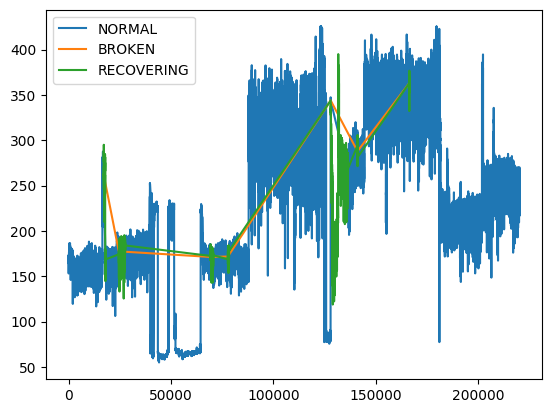

sensor 35


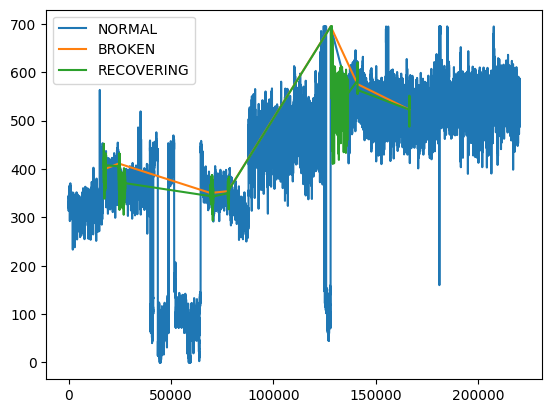

sensor 36


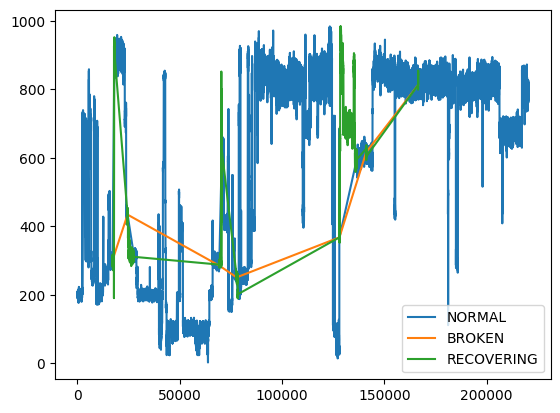

sensor 37


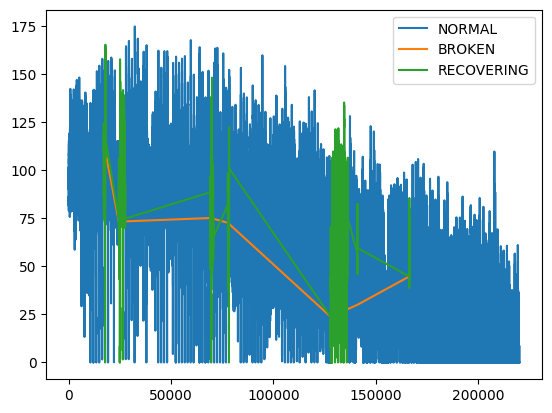

sensor 38


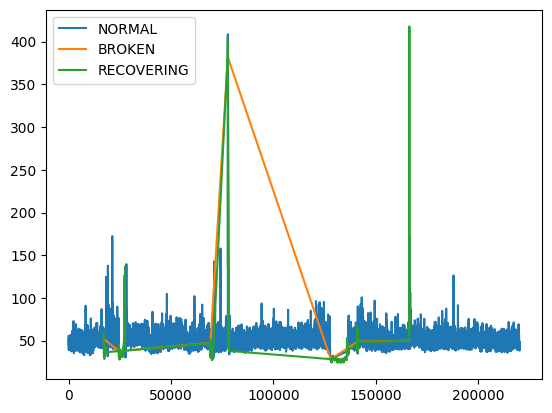

sensor 39


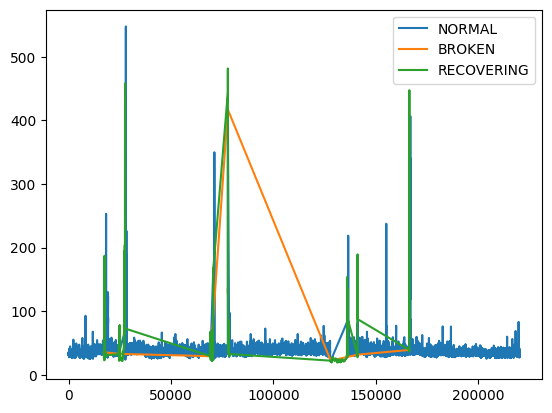

sensor 40


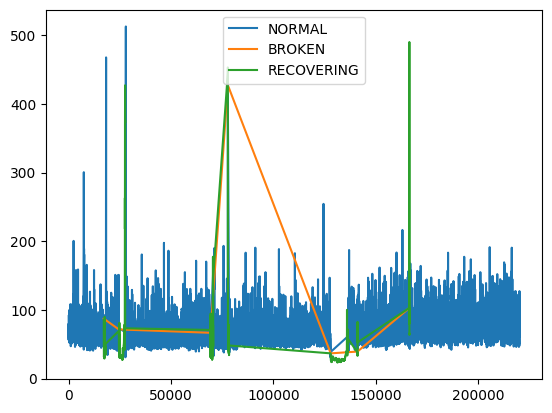

sensor 41


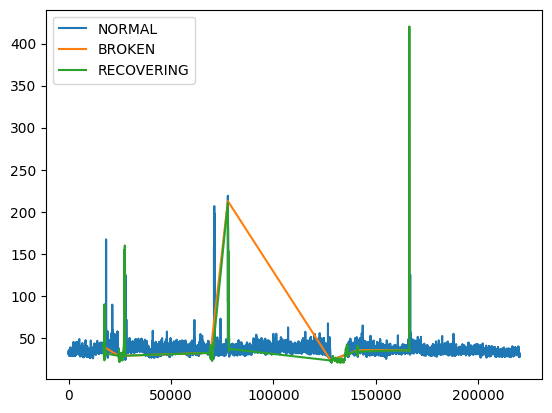

sensor 42


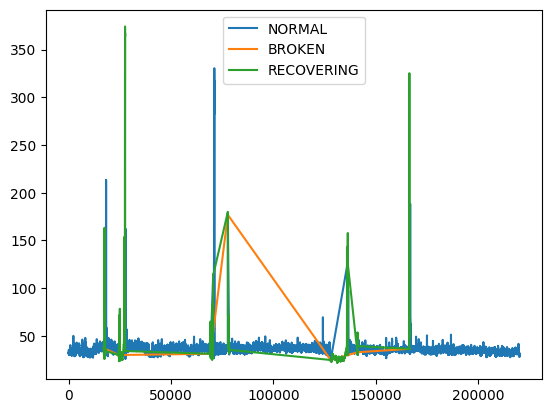

sensor 43


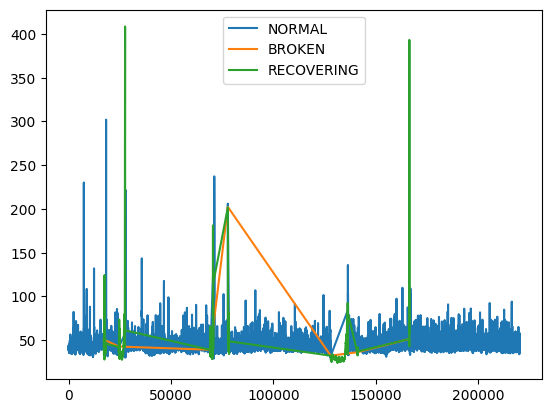

sensor 44


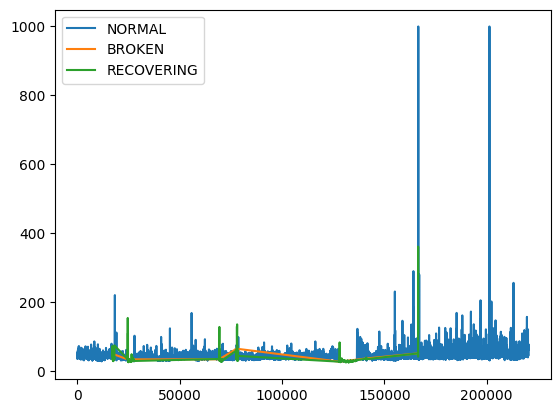

sensor 45


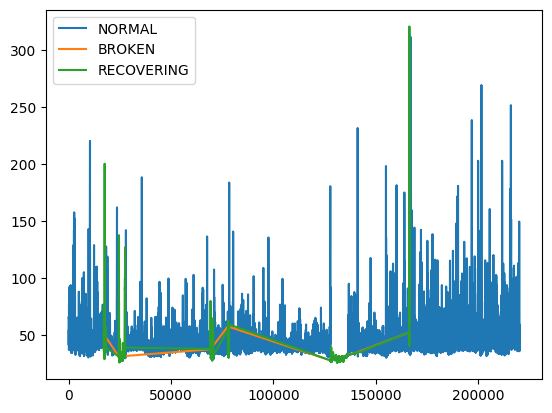

sensor 46


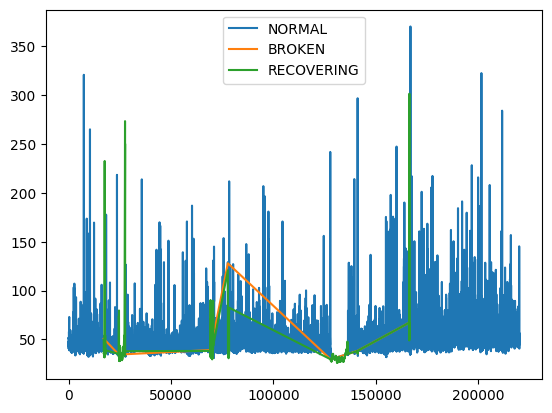

sensor 47


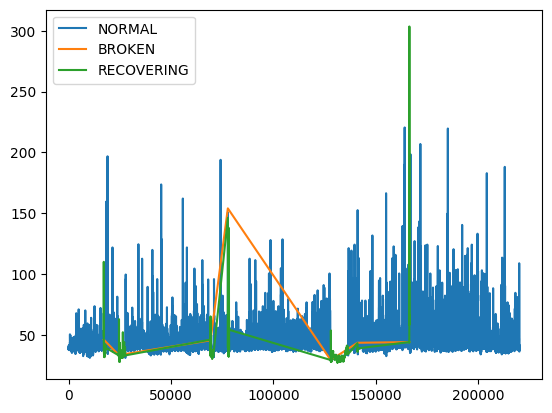

sensor 48


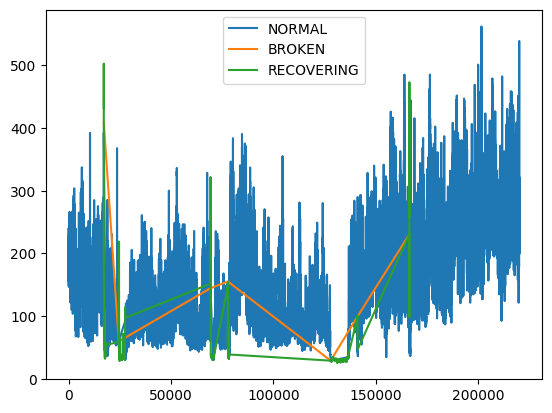

sensor 49


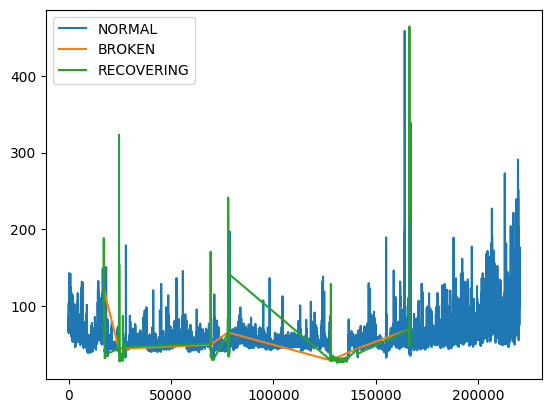

sensor 50


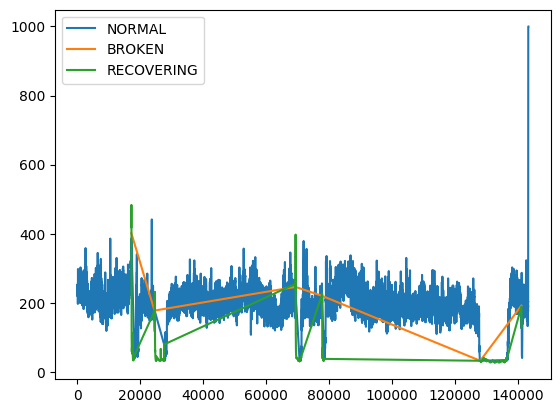

sensor 51


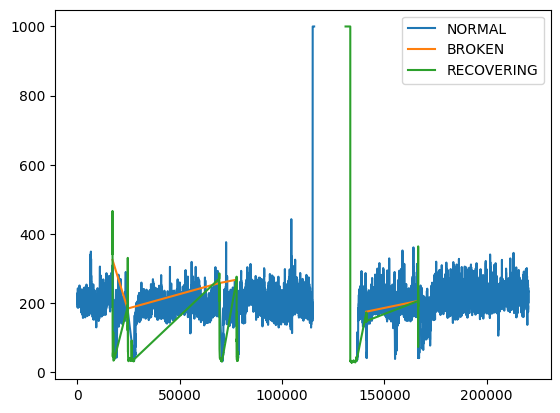

In [ ]:
import matplotlib.pyplot as plt
for i in range(52):
  print("sensor", i)
  num = str(i)
  if i <10:
    num = "0" + str(i)
  if i==15:
    continue
  plt.plot(data.loc[data['machine_status']== 'NORMAL', 'sensor_'+num], label='NORMAL')
  plt.plot(data.loc[data['machine_status']== 'BROKEN', 'sensor_'+num], label='BROKEN')
  plt.plot(data.loc[data['machine_status']== 'RECOVERING', 'sensor_'+num], label='RECOVERING')
  plt.legend()
  plt.show()

In [ ]:
data['target'] = 0 #If normal 1
data.loc[data['machine_status'] != 'NORMAL', 'target'] = 1  # if broken -1

In [ ]:
data.drop(['machine_status'],axis=1,inplace=True)

In [ ]:
data.columns

Index(['timestamp', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'sensor_50', 'sensor_51', 'target'],
      dtype='object')

In [ ]:
## Fill null values with the mean

for col in data.columns[1:-1]:
  data[col] = data[col].fillna(data[col].mean())

In [ ]:
#Rechecking this
data.isna().sum() #checks for missing values , and no missing values

timestamp    0
sensor_00    0
sensor_01    0
sensor_02    0
sensor_03    0
sensor_04    0
sensor_05    0
sensor_06    0
sensor_07    0
sensor_08    0
sensor_09    0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
sensor_20    0
sensor_21    0
sensor_22    0
sensor_23    0
sensor_24    0
sensor_25    0
sensor_26    0
sensor_27    0
sensor_28    0
sensor_29    0
sensor_30    0
sensor_31    0
sensor_32    0
sensor_33    0
sensor_34    0
sensor_35    0
sensor_36    0
sensor_37    0
sensor_38    0
sensor_39    0
sensor_40    0
sensor_41    0
sensor_42    0
sensor_43    0
sensor_44    0
sensor_45    0
sensor_46    0
sensor_47    0
sensor_48    0
sensor_49    0
sensor_50    0
sensor_51    0
target       0
dtype: int64

In [ ]:
X = data.drop(['target','timestamp'], axis=1)
y = data['target']

In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
220315    0
220316    0
220317    0
220318    0
220319    0
Name: target, Length: 220320, dtype: int64

In [ ]:
data['timestamp']

0         2018-04-01 00:00:00
1         2018-04-01 00:01:00
2         2018-04-01 00:02:00
3         2018-04-01 00:03:00
4         2018-04-01 00:04:00
                 ...         
220315    2018-08-31 23:55:00
220316    2018-08-31 23:56:00
220317    2018-08-31 23:57:00
220318    2018-08-31 23:58:00
220319    2018-08-31 23:59:00
Name: timestamp, Length: 220320, dtype: object

In [ ]:
X

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
0,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.05560,201.3889
1,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.05560,201.3889
2,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.31940,203.7037
3,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.45140,203.1250
4,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.18750,201.3889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,30.208330,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,183.04926,231.1921
220316,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,29.947920,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,183.04926,231.1921
220317,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,30.208330,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,183.04926,232.0602
220318,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,...,30.208332,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,183.04926,234.0856


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree


reg = xgb.XGBClassifier(n_estimators=800)
reg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

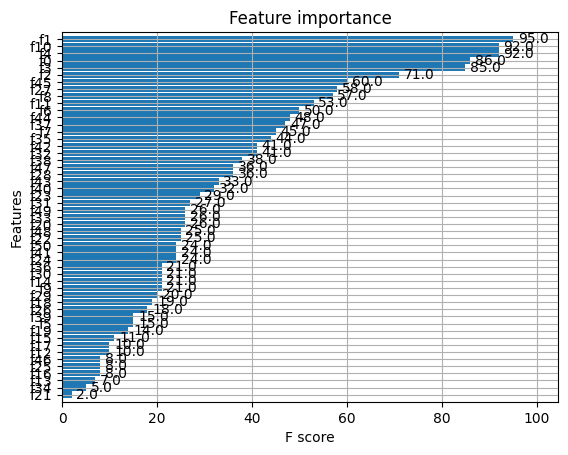

In [ ]:
_ = plot_importance(reg, height=0.9)


In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, confusion_matrix, recall_score, precision_score

reg_score = roc_auc_score(y_test, y_pred)
print(reg_score)


0.9996181522165222


In [ ]:
accuracy_reg = accuracy_score(y_test, y_pred)
precision_reg = precision_score(y_test, y_pred)
recall_reg = recall_score(y_test, y_pred)
classification_report_reg = classification_report(y_test, y_pred)

print("XGBoost Classifier")
print(f"Accuracy : {accuracy_reg}")
print(f"Precision: {precision_reg}")
print(f"Recall: {recall_reg}")
print("Classification Report:")
print(classification_report_reg)

XGBoost Classifier
Accuracy : 0.999894093439845
Precision: 0.9990682506405777
Recall: 0.9993010251630942
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61804
           1       1.00      1.00      1.00      4292

    accuracy                           1.00     66096
   macro avg       1.00      1.00      1.00     66096
weighted avg       1.00      1.00      1.00     66096



## Now let's see how unsupervised works for this algorithm

In [ ]:
from sklearn.ensemble import IsolationForest

isf_tree = IsolationForest(contamination=0.3)

isf_tree.fit(X_train)

IsolationForest(contamination=0.3)

In [ ]:
y_pred_train = isf_tree.predict(X_train)
y_pred_test = isf_tree.predict(X_test)
print(y_pred_train)
print(y_pred_test)

[ 1  1  1 ... -1  1  1]
[ 1  1  1 ... -1 -1  1]


In [ ]:
#1 is inlier in isf and -1 is outlier, so changing 1 and -1 to 0 and 1 respectively

type(y_pred_train)

numpy.ndarray

In [ ]:

y_pred_train

array([ 1,  1,  1, ..., -1,  1,  1])

In [ ]:
def replace(arr):
  arr[arr==1] = 0
  arr[arr==-1] = 1
  return arr
y_pred_train = replace(y_pred_train)
y_pred_test = replace(y_pred_test)

In [ ]:
y_pred_train

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
accuracy_score(y_train, y_pred_train)

0.7660091814503579

In [ ]:
accuracy_isf = accuracy_score(y_test, y_pred_test)
precision_isf = precision_score(y_test, y_pred_test)
recall_isf = recall_score(y_test, y_pred_test)
classification_report_isf = classification_report(y_test, y_pred_test)

In [ ]:
print("ISF Classifier - unsupervised")
print(f"Accuracy : {accuracy_isf}")
print(f"Precision: {precision_isf}")
print(f"Recall: {recall_isf}")
print("Classification Report:")
print(classification_report_isf)

## We notice that this is also able to perform optimal, we can either improve on this model, or lower the parameters in xgboost, Both of these will lead to a good result

ISF Classifier - unsupervised
Accuracy : 0.7651748971193416
Precision: 0.21651098207523353
Recall: 0.9990680335507922
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86     61804
           1       0.22      1.00      0.36      4292

    accuracy                           0.77     66096
   macro avg       0.61      0.87      0.61     66096
weighted avg       0.95      0.77      0.82     66096



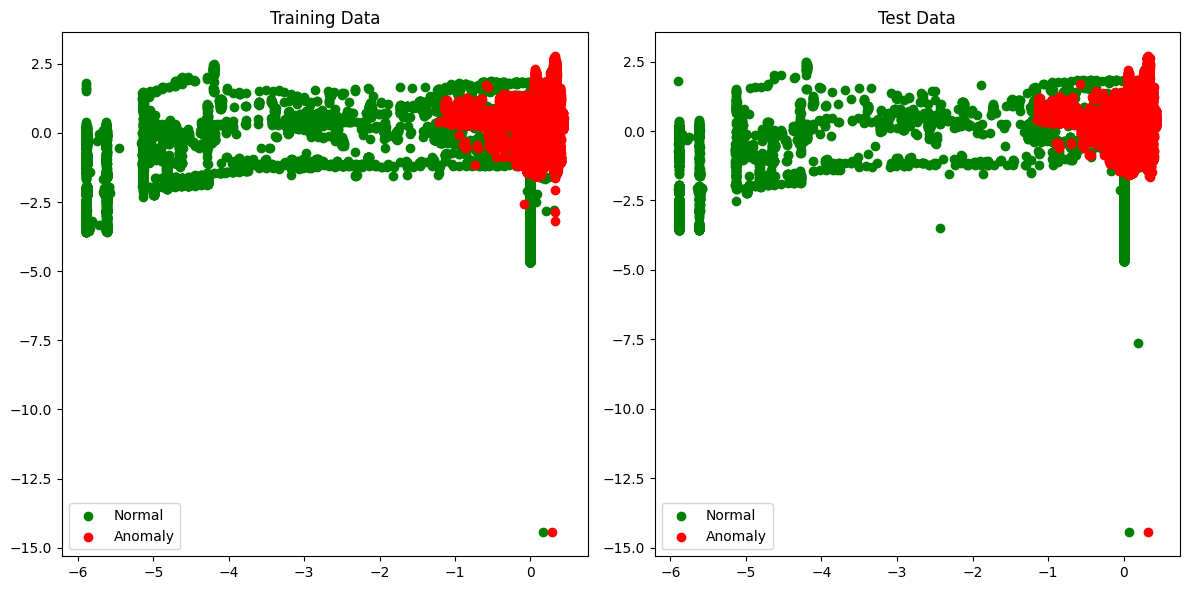

In [ ]:
def create_scatter_plots(X1, y1, title1, X2, y2, title2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Scatter plot for the first set of data #Notice that this is for first two features of dataset
    axes[0].scatter(X1[y1==1, 0], X1[y1==1, 1], color='green', label='Normal')
    axes[0].scatter(X1[y1==0, 0], X1[y1==0, 1], color='red', label='Anomaly')
    axes[0].set_title(title1)
    axes[0].legend()

    # Scatter plot for the second set of data
    axes[1].scatter(X2[y2==1, 0], X2[y2==1, 1], color='green', label='Normal')
    axes[1].scatter(X2[y2==0, 0], X2[y2==0, 1], color='red', label='Anomaly')
    axes[1].set_title(title2)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# scatter plots
create_scatter_plots(X_train, y_pred_train, 'Training Data', X_test, y_pred_test, 'Test Data')

In [ ]:
X,y

(array([[ 2.31449742e-01, -1.51674693e-01,  6.39386179e-01, ...,
          5.53137637e-01,  1.14014446e+00, -1.24016035e-02],
        [ 2.31449742e-01, -1.51674693e-01,  6.39386179e-01, ...,
          5.53137637e-01,  1.14014446e+00, -1.24016035e-02],
        [ 1.80128627e-01, -7.26133074e-02,  6.39386179e-01, ...,
          5.22905766e-01,  1.10715597e+00,  9.49949505e-03],
        ...,
        [ 6.03810161e-02,  3.27997916e-02, -9.45172778e-02, ...,
          5.13321360e+00,  1.08004771e-15,  2.77789845e-01],
        [ 8.48194055e-02,  3.27997916e-02, -9.45167155e-02, ...,
          5.05763784e+00,  1.08004771e-15,  2.96952833e-01],
        [ 6.03810161e-02,  3.27997916e-02, -9.45167155e-02, ...,
          4.87624974e+00,  1.08004771e-15,  2.96952833e-01]]),
 0         0
 1         0
 2         0
 3         0
 4         0
          ..
 220315    0
 220316    0
 220317    0
 220318    0
 220319    0
 Name: target, Length: 220320, dtype: int64)

In [56]:
from prophet import Prophet
help(Prophet.fit)

Help on function fit in module prophet.forecaster:

fit(self, df, **kwargs)
    Fit the Prophet model.
    
    This sets self.params to contain the fitted model parameters. It is a
    dictionary parameter names as keys and the following items:
        k (Mx1 array): M posterior samples of the initial slope.
        m (Mx1 array): The initial intercept.
        delta (MxN array): The slope change at each of N changepoints.
        beta (MxK matrix): Coefficients for K seasonality features.
        sigma_obs (Mx1 array): Noise level.
    Note that M=1 if MAP estimation.
    
    Parameters
    ----------
    df: pd.DataFrame containing the history. Must have columns ds (date
        type) and y, the time series. If self.growth is 'logistic', then
        df must also have a column cap that specifies the capacity at
        each ds.
    kwargs: Additional arguments passed to the optimizing or sampling
        functions in Stan.
    
    Returns
    -------
    The fitted Prophet object.

In [57]:
data.columns

Index(['timestamp', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'sensor_50', 'sensor_51', 'target'],
      dtype='object')

In [60]:
dup = data.rename(columns = {'timestamp':'ds','target':'y'})

In [61]:
dup

,ds,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,y
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.05560,201.3889,0
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.05560,201.3889,0
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.31940,203.7037,0
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.45140,203.1250,0
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.18750,201.3889,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,183.04926,231.1921,0
220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,183.04926,231.1921,0
220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,183.04926,232.0602,0
220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,183.04926,234.0856,0


In [89]:
dup.columns

Index(['ds', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51', 'y'],
      dtype='object')

In [95]:
prophet_model = Prophet()
#Currently this is a very smaller model, hence performs poorly to add more parameters and estimated params
# We need to use add_regressor method to add lot's of parameters (m.add_regressor('PM2.5',standardize=False,mode='multiplicative')) # We need to add all 56 params to calculate this, which will take a day for the setup

prophet_model.fit(dup)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdtwajems/t7vu3oqx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdtwajems/a2_mrb4c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79122', 'data', 'file=/tmp/tmpdtwajems/t7vu3oqx.json', 'init=/tmp/tmpdtwajems/a2_mrb4c.json', 'output', 'file=/tmp/tmpdtwajems/prophet_model6s8c8zdq/prophet_model-20240608182010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:20:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:24:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [96]:
future = prophet_model.make_future_dataframe(periods=60)
future.tail()


,ds
220375,2018-10-26 23:59:00
220376,2018-10-27 23:59:00
220377,2018-10-28 23:59:00
220378,2018-10-29 23:59:00
220379,2018-10-30 23:59:00


In [97]:
forecast = prophet_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
220375,2018-10-26 23:59:00,0.017324,-11.570311,9.930326
220376,2018-10-27 23:59:00,-0.003264,-11.790971,10.031207
220377,2018-10-28 23:59:00,-0.030004,-12.137100,10.481223
220378,2018-10-29 23:59:00,-0.044883,-12.348014,10.556072
220379,2018-10-30 23:59:00,-0.004410,-12.699606,10.824646


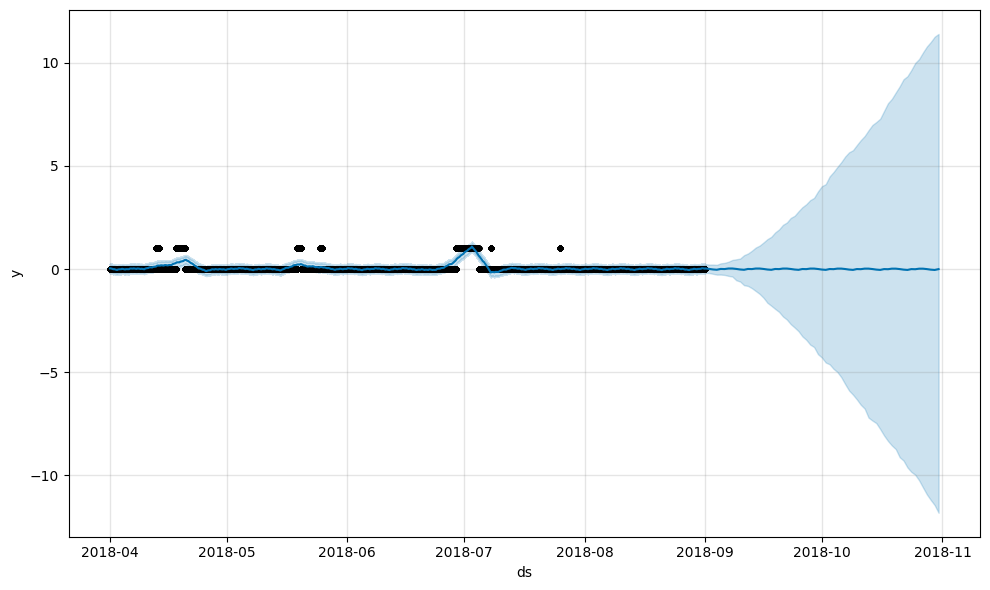

In [98]:
forecast = prophet_model.predict(future)
fig1 = prophet_model.plot(forecast)


In [66]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [99]:
data.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,target
count,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,...,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000
mean,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,...,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667,0.065741
std,0.402564,3.293904,3.666662,2.418782,144.017702,17.297501,2.140046,2.173755,2.013639,2.070033,...,11.043727,11.575646,12.836733,15.640325,10.441797,82.239917,19.142425,52.630590,105.693568,0.247829
min,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,...,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779,0.000000
25%,2.419155,46.310760,50.390620,42.838539,626.620400,69.977213,13.346350,15.856480,15.183740,15.010130,...,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,182.581000,180.555600,0.000000
50%,2.455556,48.133678,51.649300,44.227428,632.638916,75.576145,13.628470,16.167530,15.451390,15.082470,...,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,183.049260,199.942100,0.000000
75%,2.499826,49.479160,52.777770,45.312500,637.615723,80.911770,14.539930,16.427950,15.697340,15.118630,...,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,204.571800,214.699100,0.000000
max,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,25.000000,...,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000,1.000000


In [110]:
X.shape

(220320, 51)

In [101]:
data.max()

timestamp    2018-08-31 23:59:00
sensor_00               2.549016
sensor_01               56.72743
sensor_02               56.03299
sensor_03               48.22049
sensor_04                  800.0
sensor_05               99.99988
sensor_06               22.25116
sensor_07               23.59664
sensor_08               24.34896
sensor_09                   25.0
sensor_10               76.10686
sensor_11                   60.0
sensor_12                   45.0
sensor_13               31.18755
sensor_14                  500.0
sensor_16               739.7415
sensor_17             599.999939
sensor_18                4.87325
sensor_19               878.9179
sensor_20               448.9079
sensor_21               1107.526
sensor_22               594.0611
sensor_23               1227.564
sensor_24                 1000.0
sensor_25                839.575
sensor_26                1214.42
sensor_27                 2000.0
sensor_28               1841.146
sensor_29               1466.281
sensor_30 

In [117]:
x = data.min()

In [122]:
list(x)

['2018-04-01 00:00:00',
 0.0,
 0.0,
 33.15972,
 31.64062,
 2.798032,
 0.0,
 0.01446759,
 0.0,
 0.02893518,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 32.40955,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 95.52766,
 0.0,
 0.0,
 0.0,
 0.0,
 43.154790000000006,
 0.0,
 4.3193470000000005,
 0.6365742,
 0.0,
 23.95833,
 0.2407161,
 6.460602,
 54.88237,
 0.0,
 2.26097,
 0.0,
 24.4791660308838,
 19.27083,
 23.4375,
 20.83333,
 22.1354160308838,
 24.4791660308838,
 25.7523155212402,
 26.331018447876,
 26.331018447876,
 27.199070000000003,
 26.331018447876,
 26.62037,
 27.488426208496104,
 27.7777786254883,
 0]

In [123]:
min_df, max_df = list(data.min()),list(data.max())

In [127]:
cols = list(data.columns)

In [129]:
cols = cols[1:-1]
min_df = min_df[1:-1]
max_df = max_df[1:-1]

In [130]:
cols

['sensor_00',
 'sensor_01',
 'sensor_02',
 'sensor_03',
 'sensor_04',
 'sensor_05',
 'sensor_06',
 'sensor_07',
 'sensor_08',
 'sensor_09',
 'sensor_10',
 'sensor_11',
 'sensor_12',
 'sensor_13',
 'sensor_14',
 'sensor_16',
 'sensor_17',
 'sensor_18',
 'sensor_19',
 'sensor_20',
 'sensor_21',
 'sensor_22',
 'sensor_23',
 'sensor_24',
 'sensor_25',
 'sensor_26',
 'sensor_27',
 'sensor_28',
 'sensor_29',
 'sensor_30',
 'sensor_31',
 'sensor_32',
 'sensor_33',
 'sensor_34',
 'sensor_35',
 'sensor_36',
 'sensor_37',
 'sensor_38',
 'sensor_39',
 'sensor_40',
 'sensor_41',
 'sensor_42',
 'sensor_43',
 'sensor_44',
 'sensor_45',
 'sensor_46',
 'sensor_47',
 'sensor_48',
 'sensor_49',
 'sensor_50',
 'sensor_51']

In [132]:
d1 = {}
for i in range(len(cols)):
  d1[cols[i]] = [min_df[i], max_df[i]]


In [133]:
d1

{'sensor_00': [0.0, 2.549016],
 'sensor_01': [0.0, 56.727430000000005],
 'sensor_02': [33.15972, 56.032990000000005],
 'sensor_03': [31.64062, 48.220490000000005],
 'sensor_04': [2.798032, 800.0],
 'sensor_05': [0.0, 99.99988],
 'sensor_06': [0.01446759, 22.25116],
 'sensor_07': [0.0, 23.59664],
 'sensor_08': [0.02893518, 24.34896],
 'sensor_09': [0.0, 25.0],
 'sensor_10': [0.0, 76.10686],
 'sensor_11': [0.0, 60.0],
 'sensor_12': [0.0, 45.0],
 'sensor_13': [0.0, 31.18755],
 'sensor_14': [32.40955, 500.0],
 'sensor_16': [0.0, 739.7415],
 'sensor_17': [0.0, 599.999938964844],
 'sensor_18': [0.0, 4.87325],
 'sensor_19': [0.0, 878.9179],
 'sensor_20': [0.0, 448.9079],
 'sensor_21': [95.52766, 1107.526],
 'sensor_22': [0.0, 594.0611],
 'sensor_23': [0.0, 1227.564],
 'sensor_24': [0.0, 1000.0],
 'sensor_25': [0.0, 839.575],
 'sensor_26': [43.154790000000006, 1214.42],
 'sensor_27': [0.0, 2000.0],
 'sensor_28': [4.3193470000000005, 1841.146],
 'sensor_29': [0.6365742, 1466.281],
 'sensor_30':

In [137]:
dict_for_pickling = {'sc':sc, 'reg':reg, 'isf_tree':isf_tree, 'd1':d1}

import pickle
with open('dict_for_pickling.pkl', 'wb') as f:
    pickle.dump(dict_for_pickling, f)